<a href="https://colab.research.google.com/github/venkatakrishs/MNIST/blob/master/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


(60000, 28, 28)

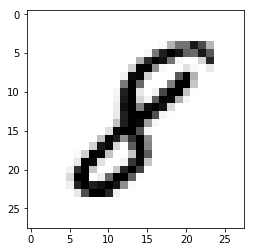

In [0]:
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')
x_train.shape

In [0]:
# Reshaping the array to 4-dims so that it can work with the Keras API
#shape[0] gives the number of elements in the array.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [0]:
model.compile(optimizer='SGD', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train, epochs=10)
print(history.history)

Epoch 1/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.0274 - acc: 0.9912
Epoch 2/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0256 - acc: 0.9917
Epoch 3/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0239 - acc: 0.9924
Epoch 4/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0229 - acc: 0.9928
Epoch 5/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0229 - acc: 0.9925
Epoch 6/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0217 - acc: 0.9929
Epoch 7/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0209 - acc: 0.9932
Epoch 8/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0203 - acc: 0.9934
Epoch 9/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0194 - acc: 0.9935
Epoch 10/10
60000/60000 [==============================] - 10s 170us/step - loss: 

dict_keys(['loss', 'acc'])


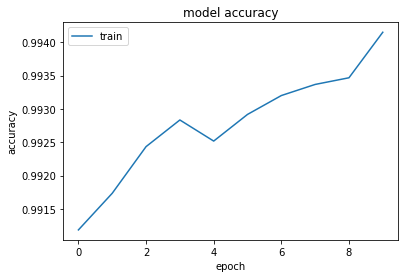

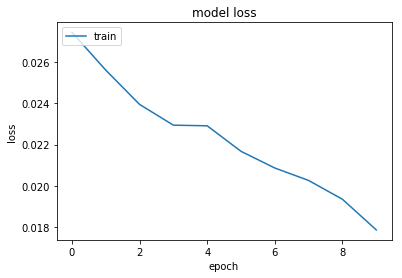

In [0]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'acc'])


In [0]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 87us/step


[0.032062868102073844, 0.9904]

1


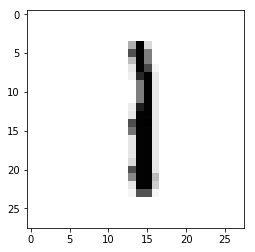

In [0]:
image_index = 2041
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())